In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score


In [20]:
df=pd.read_csv('uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


1.preprocessing

In [5]:
df.drop(['Unnamed: 0','key'],axis=1,inplace=True)

In [18]:
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


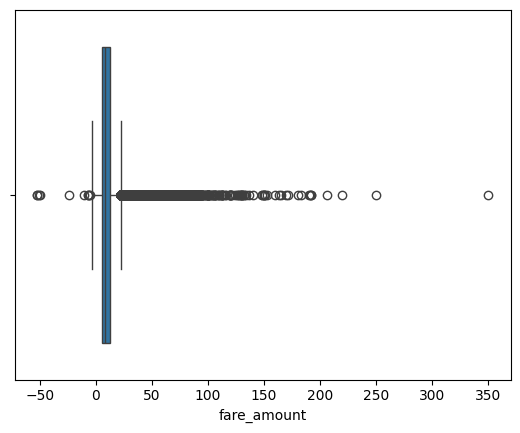

In [9]:
sns.boxplot(x=df['fare_amount'])
plt.show()

2.remove outliers

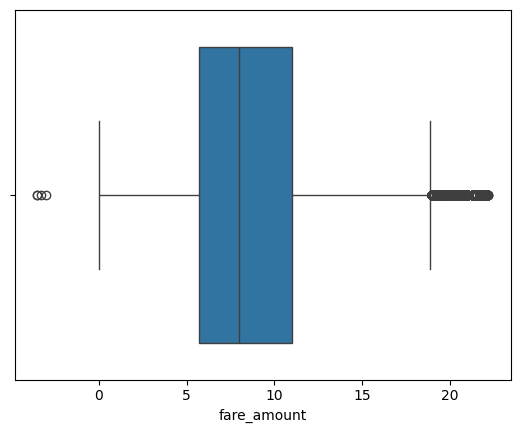

In [10]:
# Calculate the IQR for the 'fare_amount' column
Q1 = df["fare_amount"].quantile(0.25)
Q3 = df["fare_amount"].quantile(0.75)
IQR = Q3 - Q1

# Define a threshold (e.g., 1.5 times the IQR) to identify outliers
threshold = 1.5
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Remove outliers
data_no_outliers = df[(df["fare_amount"] >= lower_bound) & (df["fare_amount"] <= upper_bound)]

# Visualize the 'fare_amount' distribution without outliers
sns.boxplot(x=data_no_outliers["fare_amount"])
plt.show()

# 3. Check the correlation


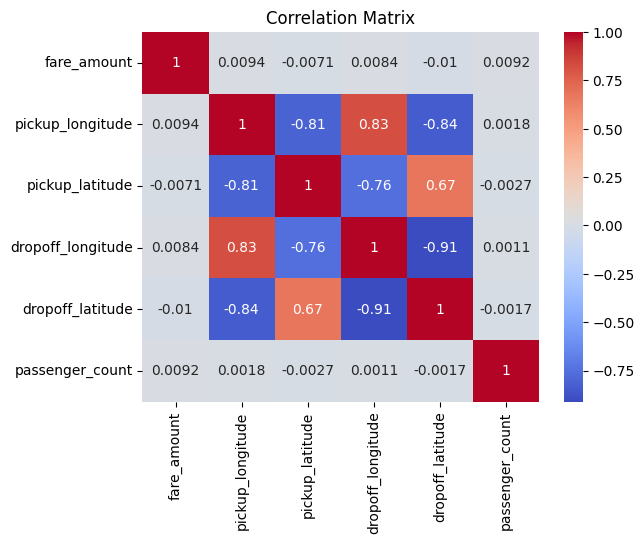

In [11]:
# Determine the correlation between features and the target variable (fare_amount).
numeric_data = df.select_dtypes(include=[int, float])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')#convert all the values in it to proper date and time objects, and if you find any values that you can't convert, just replace them with 'NaT' (missing values)."

In [22]:
std=StandardScaler()
X_std=std.fit_transform(X)
y_std=std.fit_transform(y.values.reshape(-1, 1))

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X_std,y_std,test_size=0.2,random_state=42)

In [26]:
Linear=LinearRegression()
Linear.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred=Linear.predict(X_test)

In [28]:
r2_ln=r2_score(y_test,y_pred)
rsme_ln=np.sqrt(mean_squared_error(y_test,y_pred))
print("R2 Score for Linear Regression is : ",r2_ln)
print("RSME for Linear Regression is : ",rsme_ln)

R2 Score for Linear Regression is :  0.00034621862586170504
RSME for Linear Regression is :  1.0277639518422317


In [29]:
Random=RandomForestRegressor(n_estimators=100,random_state=42)
Random.fit(X_train,y_train.ravel())

RandomForestRegressor(random_state=42)

In [30]:
y_pred_rf=Random.predict(X_test)

In [31]:
r2_rf=r2_score(y_test,y_pred)
rsme_rf=np.sqrt(mean_squared_error(y_test,y_pred))
print("R2 Score for Random Forest Regression is : ",r2_rf)
print("RSME for Random Forest Regression is : ",rsme_rf)

R2 Score for Random Forest Regression is :  0.00034621862586170504
RSME for Random Forest Regression is :  1.0277639518422317
